# Newton rings.

In [2]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')

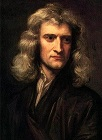
 *Sir Isaac Newton, (Woolsthorpe-by-Colsterworth, 1643 – Kensington, 1727).*


When Newton was experimenting with light and lenses he observed a dark spot on 
the lens which was on a glass plate. Closer inspection showed a set of 
alternating dark and light concentric rings. Newton analyzed this wave 
phenomenon although he was a supporter of the corpuscular theory of light.

Newton rings can be observed when a spherical glass surface lies on a flat glass. 
The reflections of a beam of light reflected from these surfaces will show an 
interference pattern. In these experiments the radius of curvature of the lens 
will be measured and the influence of replacing the refractive index of the film 
between the two glass surfaces will be investigated.
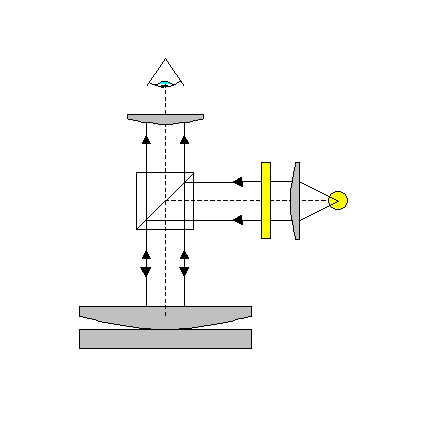
*Newton rings setup.*

### 1. Measurement of the radius of curvature of the lens.

   1.  How can the radius of curvature of the lens be determined if the diameters 
        of the rings in the interference pattern are known? Derive an equation.
   2.  Choose a value for the wavelength of the (monochromatic) light beam.
   3.  Measure the diameters of the rings and plot the diameter as a function of 
        the ring-number. (Plot as a straight line, don’t forget the experimental errors 
        (draw error bars!) ).
   4.  Repeat 2 and 3 for a few (about 3) other values of the wavelength.
   5.  Determine the radius of curvature of the lens for all wavelengths chosen 
        and check if the measured lens-radii are equal within experimental error.


### 2. Measurement of the refractive index of the film between the lens and the flat plate.

   1.  Replace the air between the plate and the lens surfaces with a transparent medium 
        with index larger than one. Find the value of the refractive index of this medium 
        by measuring the diameters of the Newton rings.

### 3. Questions.

   1.  What happens if the beam of light is not monochromatic but contains a large 
        number of wavelengths?
   2.  What type of fringes are the Newton rings. Explain why you need a lens to 
        observe the interference pattern.
   3.  What will happen with the fringes when the lens is deformed by pressing the 
        edges of the lens?
   4.  One can use the Newton rings set-up to inspect the quality of the lens surface, 
        deviations from the spherical (or aspherical) surface will become visible. 
        How can you enhance the accuracy of this inspection method?
   5.  Usually lenses are mounted in holders in an optical experiment. 
        Never use a lens holder where the lens is clamped with a screw, 
        but mount the lens with a ring instead. Explain why.

Literature: Pedrotti, 3rd ed., chapter 7-6. https://www.amazon.com/Introduction-Optics-3rd-Frank-Pedrotti/dp/0131499335


<IPython.core.display.Javascript object>


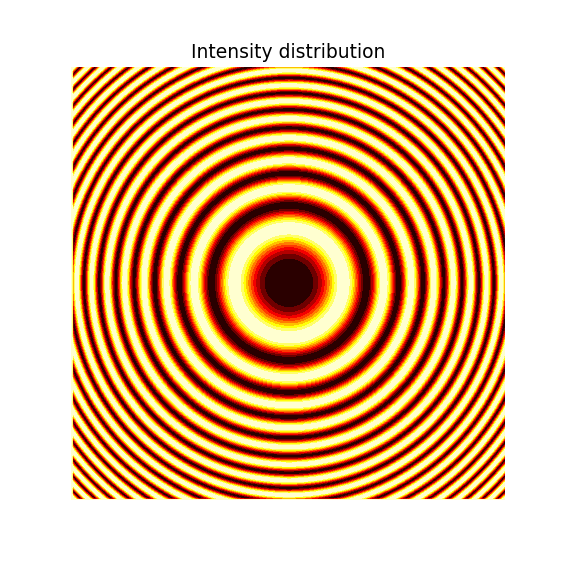

interactive(children=(FloatSlider(value=530.0, continuous_update=False, description='$\\lambda$ [nm]', max=100…

In [8]:
%matplotlib notebook

#!/usr/bin/env python
"""
    Computer practical 4. Newton rings.
    ====================================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates the Newton rings experiment.
    Measure the diameter of the rings and find the radius of curvature
    of the lens. Find the refractive index of the medium between the lens and the plate.
    
    ..  :copyright: (c) 2017 by Fred van Goor.
    :license: MIT, see License for more details.
    
"""
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from LightPipes import *
import math

size=5*mm;
N=300

R=150*cm


nfilm = 1.0

fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
#cursor = Cursor(ax,useblit=False, color='red', linewidth=2);

d=np.ndarray((N,N))
X=np.arange(-size/2,size/2,size/N)
Y=X

for i in range(1, N):
    for j in range(1, N):
        r2 = X[i]*X[i] + Y[j]*Y[j]
        d[i][j] = r2 / 2 / R

def NewtonRingsSim(labda,nmediumCheck):
    labda = labda * nm
    if nmediumCheck:
        nf = 1.74
    else:
        nf = 1.0
    F=Begin(size,labda,N);
    F1 = F
    Phi = Phase(F);
    k = 2 * math.pi / labda;
    p2 = 2 * nf * k;
    for i in range(1, N):
        for j in range(1, N):
            Phi[i][j] = p2 * d[i][j] + math.pi
    F = SubPhase(Phi, F);
    F = BeamMix(F1, F);
    I = Intensity(0, F);
    ax.contourf(I,10,cmap='hot')
    ax.axis('off'); ax.axis('equal');
    str='Intensity distribution'
    ax.set_title(str)
    ax.format_coord = lambda x, y: 'x = %2.2f mm, y = %2.2f mm, Intensity = %2.4f a.u.' % ((-size/2 + x*size/N)/mm, (-size/2 + y*size/N)/mm, I[int(x)][int(y)])
    plt.show()
    
w=interact(NewtonRingsSim,
           nmediumCheck=widgets.Checkbox(value=False, description='insert medium', disabled=False),
           labda=widgets.FloatSlider(description='$\lambda$ [nm]',min=300.0,max=1000.0,step=0.1,value=530.0,continuous_update=False,readout_format='.1f'),
          );

help: https://opticspy.github.io/lightpipes/NewtonRings.html